In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [30]:
x, y = make_regression(n_samples=50,n_features=1,noise=40,random_state=4)

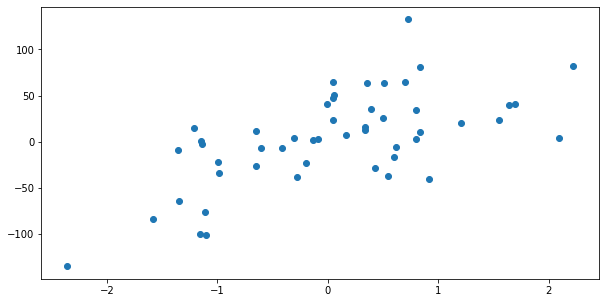

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(x,y)

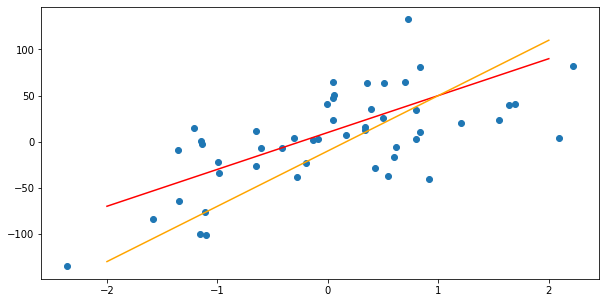

In [41]:
xx = np.linspace(-2,2,50)
yy = 40*xx + 10
yy2 = 60*xx - 10
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.plot(xx,yy,c='r')
plt.plot(xx,yy2,c='orange')

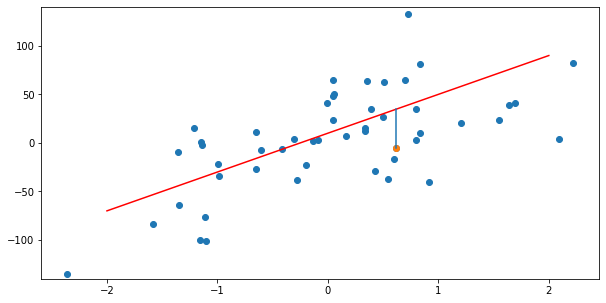

In [57]:
ymin = -140
ymax = 140
plt.figure(figsize=(10,5))
plt.ylim(ymin,ymax)
plt.scatter(x,y)
plt.plot(xx,yy,c='r')
plt.scatter(x[9],y[9])
plt.axvline(x[9],ymin=(y[9]-ymin)/(ymax-ymin), ymax=(40*x[9]+10-ymin)/(ymax-ymin))

In [119]:
def cost_function_example(x,y,coeff,intercept,fraction):
    ymin = min(y)-10
    ymax = max(y)+10
    yy = coeff*x + intercept
    points = np.random.choice(range(0,len(x)),int(fraction*len(x)),replace=False)
    
    plt.figure(figsize=(10,5))
    plt.ylim(ymin,ymax)
    plt.scatter(x,y)
    plt.plot(x,yy,c='r')
    for n in points:
        seg_min = min((y[n]-ymin)/(ymax-ymin),(coeff*x[n]+intercept-ymin)/(ymax-ymin))
        seg_max = max((y[n]-ymin)/(ymax-ymin),(coeff*x[n]+intercept-ymin)/(ymax-ymin))
        plt.axvline(x[n],ymin=seg_min, ymax=seg_max,c='purple')

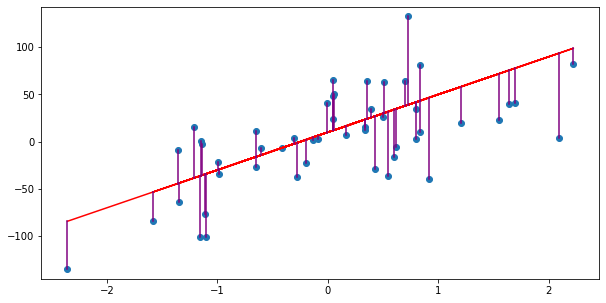

In [115]:
cost_function_example(x,y,40,10,1)

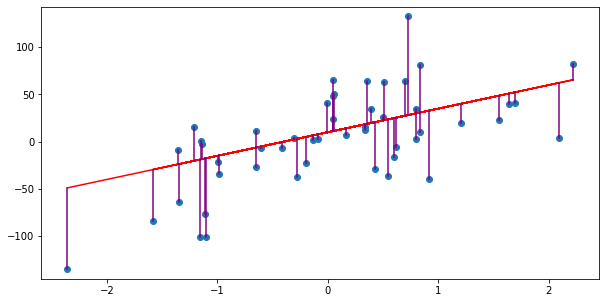

In [117]:
cost_function_example(x,y,25,10,1)

In [172]:
def cost_function_sse(x,y,coeff,intercept):
    ymin = min(y)-10
    ymax = max(y)+10
    yy = coeff*x + intercept
    
    plt.figure(figsize=(10,5))
    plt.ylim(ymin,ymax)
    plt.scatter(x,y)
    plt.plot(x,yy,c='r')
    sse = 0
    for n in range(0,len(x)):
        seg_min = min((y[n]-ymin)/(ymax-ymin),(coeff*x[n]+intercept-ymin)/(ymax-ymin))
        seg_max = max((y[n]-ymin)/(ymax-ymin),(coeff*x[n]+intercept-ymin)/(ymax-ymin))
        plt.axvline(x[n],ymin=seg_min, ymax=seg_max,c='purple')
        sse += (y[n]-(coeff*x[n]+intercept))**2
    plt.title(f'Sum of squared errors: {round(sse[0],2)}')
    
    props = dict(boxstyle='round', facecolor='blue', alpha=0.2)
    plt.text(min(x), max(y), f'Coefficient: {coeff} \n Intercept: {intercept}',
             fontsize=14, verticalalignment='top',bbox=props)

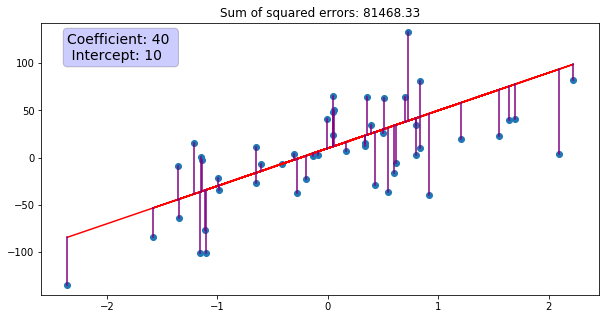

In [173]:
cost_function_sse(x,y,40,10)

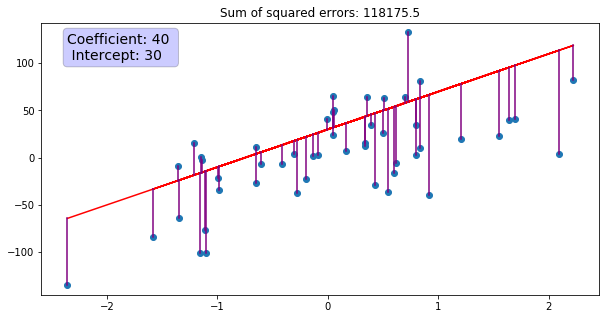

In [174]:
cost_function_sse(x,y,40,30)

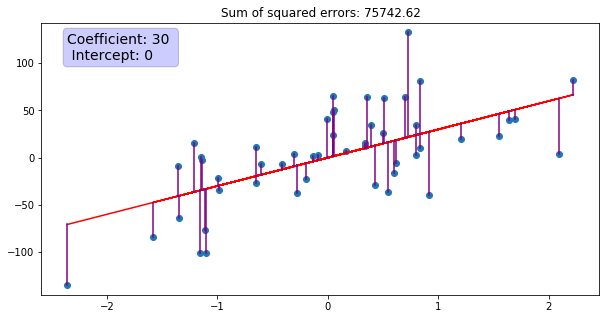

In [178]:
cost_function_sse(x,y,30,0)

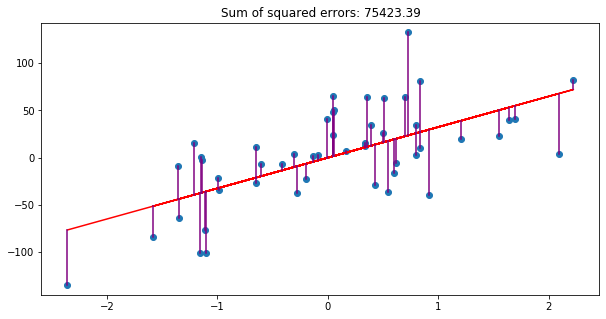

In [139]:
cost_function_sse(x,y,32.476,0)

In [135]:
lr = LinearRegression()
lr.fit(x,y)
lr.coef_

array([32.47696119])